<a href="https://colab.research.google.com/github/Joss5499/Ejercicios/blob/main/ProyectoPerroGato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Paso 1: Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import files
import io
from PIL import Image
from tensorflow.keras.applications.vgg16 import preprocess_input



Saving gato-de-raza-ragdoll_5c5827ec_230414185205_1000x1493.jpg to gato-de-raza-ragdoll_5c5827ec_230414185205_1000x1493.jpg


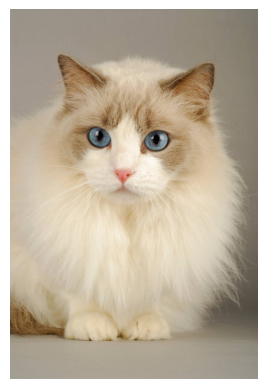

In [8]:
# Paso 2: Cargar la imagen seleccionada por el usuario
uploaded = files.upload()  # Esto abrirá un cuadro para que selecciones la imagen

# Obtener el nombre del primer archivo cargado
img_path = next(iter(uploaded))

# Abrir y mostrar la imagen cargada
img = Image.open(io.BytesIO(uploaded[img_path]))
plt.imshow(img)
plt.axis('off')
plt.show()


In [5]:
# Paso 3: Preprocesar la imagen para que sea compatible con el modelo VGG16
img = img.resize((224, 224))  # Redimensionar a 224x224
img_array = img_to_array(img)  # Convertir la imagen a un array numpy
img_array = img_array.astype('float32') / 255.0  # Normalizar la imagen
img_array = np.expand_dims(img_array, axis=0)  # Añadir la dimensión de batch (1, 224, 224, 3)

# Preprocesar la imagen según lo que espera VGG16
img_array = preprocess_input(img_array)  # Usamos el preprocesamiento específico de VGG16


In [10]:
# Paso 4: Crear el modelo utilizando transfer learning (VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Congelar las capas preentrenadas

# Crear el modelo agregando nuestras propias capas
modelo = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # 2 clases: Perro y Gato
])

# Compilar el modelo
modelo.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
modelo.summary()  # Ver el resumen del modelo


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,338 (68.38 MB)

 Trainable params: 3,211,650 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Paso 5: Entrenar el modelo (si tienes un dataset)
# Aquí tendrías que cargar tu conjunto de datos y entrenar el modelo. Por ejemplo:
# Usamos ImageDataGenerator para cargar imágenes de un directorio.

# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preparar un generador de imágenes para el entrenamiento
# (Aquí debes usar un conjunto de datos de perros y gatos)
# train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# train_generator = train_datagen.flow_from_directory('path_to_train_data', target_size=(224, 224), batch_size=32, class_mode='categorical')

# Entrenar el modelo con el generador
# modelo.fit(train_generator, epochs=10)

# Si tienes un conjunto de validación, puedes añadirlo aquí:
# validation_generator = valid_datagen.flow_from_directory('path_to_validation_data', target_size=(224, 224), batch_size=32, class_mode='categorical')
# modelo.fit(train_generator, validation_data=validation_generator, epochs=10)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step
La imagen es de un Gato


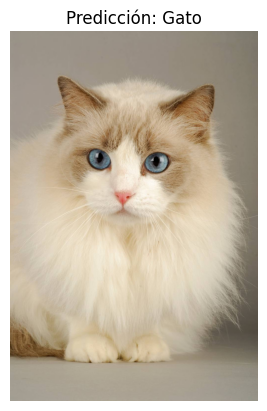

In [11]:
# Paso 6: Hacer predicción sobre la imagen cargada
# Realizar la predicción para la imagen cargada
predicciones = modelo.predict(img_array)

# Obtener la clase predicha (0 = Gato, 1 = Perro)
clase_predicha = np.argmax(predicciones)  # 0 = Gato, 1 = Perro

# Mostrar la clase predicha
if clase_predicha == 0:
    print("La imagen es de un Gato")
else:
    print("La imagen es de un Perro")

# Mostrar la imagen junto con el resultado de la predicción
plt.imshow(img)
plt.title("Predicción: " + ("Gato" if clase_predicha == 0 else "Perro"))
plt.axis('off')
plt.show()
